# All Code for Necessary and Sufficient Conditions

## Definition
- **Necessary** 
    - If top1%NW US households population don't have non-residential real estate investments in their net worth value, how many proportion of them will no longer in top1%NW

- **Sufficient** 
    - If top1%NW US households population ONLY have non-residential real estate investments in their net worth value, how many proportion of them will still be in top1%NW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Prepare Data

In [6]:
df = df = pd.read_csv("sliced_data_0322.csv", low_memory=False)
df = pd.DataFrame(df)

In [3]:
df

Unnamed: 0  year  x1701  x2001  x2002  x2003  x2004  x2010  x2005  \
0                0  2019      0      0    0.0    0.0      0    0.0      0   
1                1  2019      0      0    0.0    0.0      0    0.0      0   
2                2  2019      0      0    0.0    0.0      0    0.0      0   
3                3  2019      0      0    0.0    0.0      0    0.0      0   
4                4  2019      0      0    0.0    0.0      0    0.0      0   
...            ...   ...    ...    ...    ...    ...    ...    ...    ...   
267760      267760  1989      0      0    0.0    0.0      0    0.0      0   
267761      267761  1989      0      0    0.0    0.0      0    0.0      0   
267762      267762  1989      0      0    0.0    0.0      0    0.0      0   
267763      267763  1989      0      0    0.0    0.0      0    0.0      0   
267764      267764  1989      0      0    0.0    0.0      0    0.0      0   

        x2006  ...  IFINPLAN  SPENDLESS  EXPENSHILO  EMERGPSTP  ONE_PERC  \
0         0.0  ...       1.0        2.0         1.0        0.0       0.0   
1         0.0  ...       1.0        2.0         1.0        0.0       0.0   
2         0.0  ...       1.0        2.0         1.0        0.0       0.0   
3         0.0  ...       1.0        2.0         1.0        0.0       0.0   
4         0.0  ...       1.0        2.0         1.0        0.0       0.0   
...       ...  ...       ...        ...         ...        ...       ...   
267760    0.0  ...       NaN        NaN         NaN        NaN       0.0   
267761    0.0  ...       NaN        NaN         NaN        NaN       0.0   
267762    0.0  ...       NaN        NaN         NaN        NaN       0.0   
267763    0.0  ...       NaN        NaN         NaN        NaN       0.0   
267764    0.0  ...       NaN        NaN         NaN        NaN       0.0   

        total_real_estate  own_real_estate  real_estate_investment  \
0            1.100000e+06                1                     0.0   
1            1.100000e+06                1                     0.0   
2            1.100000e+06                1                     0.0   
3            1.100000e+06                1                     0.0   
4            1.100000e+06                1                     0.0   
...                   ...              ...                     ...   
267760       1.988953e+04                1                     0.0   
267761       1.988953e+04                1                     0.0   
267762       1.988953e+04                1                     0.0   
267763       1.988953e+04                1                     0.0   
267764       1.988953e+04                1                     0.0   

        own_investment_real_estate  own_residential_real_estate  
0                                0                            1  
1                                0                            1  
2                                0                            1  
3                                0                            1  
4                                0                            1  
...                            ...                          ...  
267760                           0                            1  
267761                           0                            1  
267762                           0                            1  
267763                           0                            1  
267764                           0                            1  

[267765 rows x 374 columns]

## Demo for Necessary and Sufficient Process

### 1. Calculate Top 1% NW Threshold

In [6]:
threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)

In [7]:
threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})

In [8]:
threshold

THRESHOLD  year
219184  4.105515e+06  1995
234189  4.153558e+06  1992
257768  4.616420e+06  1989
203894  5.979453e+06  1998
92113   8.031179e+06  2010
186654  8.470422e+06  2001
158688  8.616721e+06  2004
84808   8.654020e+06  2013
127336  1.033762e+07  2007
29379   1.100829e+07  2016
21555   1.112100e+07  2019

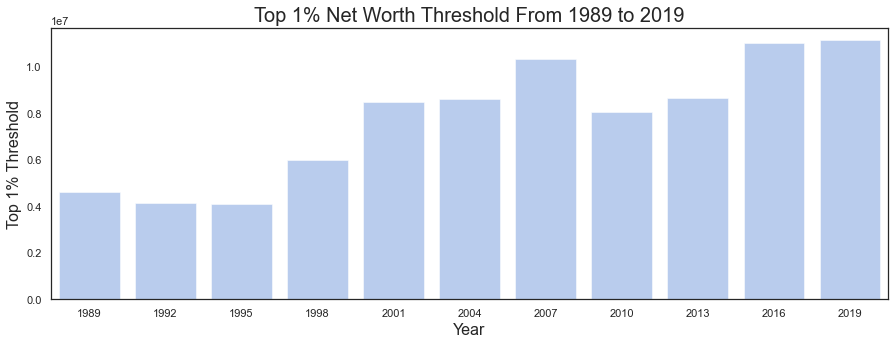

In [31]:
sn.set(rc={"figure.figsize":(15, 5)})
sn.set_theme(style="white", palette="Set2")
ax = sn.barplot(data=threshold, x="year", y="THRESHOLD", color = "cornflowerblue", alpha = 0.5)

ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Top 1% Threshold', fontsize=16);
ax.set_title("Top 1% Net Worth Threshold From 1989 to 2019", fontsize=20)

plt.show()

In [7]:
df_thresh = pd.merge(df, threshold, how="inner", on=["year", "year"])

In [8]:
df_thresh

Unnamed: 0  year  x1701  x2001  x2002  x2003  x2004  x2010  x2005  \
0                0  2019      0      0    0.0    0.0      0    0.0      0   
1                1  2019      0      0    0.0    0.0      0    0.0      0   
2                2  2019      0      0    0.0    0.0      0    0.0      0   
3                3  2019      0      0    0.0    0.0      0    0.0      0   
4                4  2019      0      0    0.0    0.0      0    0.0      0   
...            ...   ...    ...    ...    ...    ...    ...    ...    ...   
267760      267760  1989      0      0    0.0    0.0      0    0.0      0   
267761      267761  1989      0      0    0.0    0.0      0    0.0      0   
267762      267762  1989      0      0    0.0    0.0      0    0.0      0   
267763      267763  1989      0      0    0.0    0.0      0    0.0      0   
267764      267764  1989      0      0    0.0    0.0      0    0.0      0   

        x2006  ...  SPENDLESS  EXPENSHILO  EMERGPSTP  ONE_PERC  \
0         0.0  ...        2.0         1.0        0.0       0.0   
1         0.0  ...        2.0         1.0        0.0       0.0   
2         0.0  ...        2.0         1.0        0.0       0.0   
3         0.0  ...        2.0         1.0        0.0       0.0   
4         0.0  ...        2.0         1.0        0.0       0.0   
...       ...  ...        ...         ...        ...       ...   
267760    0.0  ...        NaN         NaN        NaN       0.0   
267761    0.0  ...        NaN         NaN        NaN       0.0   
267762    0.0  ...        NaN         NaN        NaN       0.0   
267763    0.0  ...        NaN         NaN        NaN       0.0   
267764    0.0  ...        NaN         NaN        NaN       0.0   

        total_real_estate  own_real_estate  real_estate_investment  \
0            1.100000e+06                1                     0.0   
1            1.100000e+06                1                     0.0   
2            1.100000e+06                1                     0.0   
3            1.100000e+06                1                     0.0   
4            1.100000e+06                1                     0.0   
...                   ...              ...                     ...   
267760       1.988953e+04                1                     0.0   
267761       1.988953e+04                1                     0.0   
267762       1.988953e+04                1                     0.0   
267763       1.988953e+04                1                     0.0   
267764       1.988953e+04                1                     0.0   

        own_investment_real_estate  own_residential_real_estate     THRESHOLD  
0                                0                            1  1.112100e+07  
1                                0                            1  1.112100e+07  
2                                0                            1  1.112100e+07  
3                                0                            1  1.112100e+07  
4                                0                            1  1.112100e+07  
...                            ...                          ...           ...  
267760                           0                            1  4.616420e+06  
267761                           0                            1  4.616420e+06  
267762                           0                            1  4.616420e+06  
267763                           0                            1  4.616420e+06  
267764                           0                            1  4.616420e+06  

[267765 rows x 375 columns]

### 2. Necessary Condition

In [9]:
df_thresh['NW_wo_RWI'] = df_thresh['NETWORTH'] - df_thresh['NNRESRE'] # RWI = non-residential RE properties

In [10]:
sum_weights_belTH_Q1 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['NW_wo_RWI'] < df_thresh['THRESHOLD']]
sum_weights_belTH_Q1

Unnamed: 0  year  x1701  x2001     x2002    x2003  x2004  x2010  \
285            285  2019      4      1  200000.0  50000.0      5    0.0   
286            286  2019      4      1  200000.0  50000.0      5    0.0   
288            288  2019      4      1  200000.0  50000.0      5    0.0   
289            289  2019      4      1  200000.0  50000.0      5    0.0   
2235          2235  2019      1      0       0.0      0.0      0    0.0   
...            ...   ...    ...    ...       ...      ...    ...    ...   
264931      264931  1989      1      0       0.0      0.0      0    0.0   
265800      265800  1989      5      5       0.0      0.0      0    0.0   
265803      265803  1989      5      5       0.0      0.0      0    0.0   
266216      266216  1989      2      0       0.0      0.0      0    0.0   
266217      266217  1989      2      0       0.0      0.0      0    0.0   

        x2005  x2006  ...  EXPENSHILO  EMERGPSTP  ONE_PERC  total_real_estate  \
285         5    0.0  ...         3.0        0.0       1.0       3.650000e+06   
286         5    0.0  ...         3.0        0.0       1.0       3.650000e+06   
288         5    0.0  ...         3.0        0.0       1.0       3.650000e+06   
289         5    0.0  ...         3.0        0.0       1.0       3.650000e+06   
2235        0    0.0  ...         1.0        0.0       1.0       5.500000e+06   
...       ...    ...  ...         ...        ...       ...                ...   
264931      0    0.0  ...         NaN        NaN       1.0       1.690610e+06   
265800      0    0.0  ...         NaN        NaN       1.0       1.396245e+06   
265803      0    0.0  ...         NaN        NaN       1.0       1.396245e+06   
266216      0    0.0  ...         NaN        NaN       1.0       2.084423e+05   
266217      0    0.0  ...         NaN        NaN       1.0       2.108290e+05   

        own_real_estate  real_estate_investment  own_investment_real_estate  \
285                   1           300000.000000                           1   
286                   1           300000.000000                           1   
288                   1           300000.000000                           1   
289                   1           300000.000000                           1   
2235                  1                0.000000                           1   
...                 ...                     ...                         ...   
264931                1                0.000000                           1   
265800                1           123738.270029                           1   
265803                1           123738.270029                           1   
266216                1                0.000000                           1   
266217                1                0.000000                           1   

        own_residential_real_estate     THRESHOLD     NW_wo_RWI  
285                               1  1.112100e+07  1.072000e+07  
286                               1  1.112100e+07  1.091400e+07  
288                               1  1.112100e+07  1.077200e+07  
289                               1  1.112100e+07  1.072900e+07  
2235                              1  1.112100e+07  1.027700e+07  
...                             ...           ...           ...  
264931                            1  4.616420e+06  4.614968e+06  
265800                            1  4.616420e+06  3.651718e+06  
265803                            1  4.616420e+06  4.148956e+06  
266216                            1  4.616420e+06  4.580559e+06  
266217                            1  4.616420e+06  4.604427e+06  

[1341 rows x 376 columns]

In [11]:
# sum of weights who satisfy the NEC condition in top 1%
sum_weights_belTH_Q1 = sum_weights_belTH_Q1[['year', 'WGT']].groupby('year').sum()
sum_weights_belTH_Q1

WGT
year               
1989  159571.437616
1992  181267.101938
1995   68349.805299
1998  109966.520921
2001  126599.655287
2004  125375.013455
2007   76030.229619
2010   94791.695336
2013   96262.206316
2016   99348.574767
2019   65340.318261

In [12]:
# sum of weights for all top 1%
sum_weight_Q1_1pct = (df.loc[df["ONE_PERC"]==1])[['year','WGT']].groupby('year').sum()
sum_weight_Q1_1pct

WGT
year              
1989  9.306491e+05
1992  9.591763e+05
1995  9.905454e+05
1998  1.025950e+06
2001  1.064964e+06
2004  1.121664e+06
2007  1.161521e+06
2010  1.176439e+06
2013  1.228504e+06
2016  1.260707e+06
2019  1.289975e+06

In [13]:
NEC = (sum_weights_belTH_Q1/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_NEC'})
NEC

PROP_NEC
year          
1989  0.171463
1992  0.188982
1995  0.069002
1998  0.107185
2001  0.118877
2004  0.111776
2007  0.065457
2010  0.080575
2013  0.078357
2016  0.078804
2019  0.050652

### 3. Sufficient Condition

In [14]:
df_thresh['RWI'] = df_thresh['NNRESRE']

In [15]:
sum_weights_abvTH_Q2 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['RWI'] >= df_thresh['THRESHOLD']]
sum_weights_abvTH_Q2

Unnamed: 0  year  x1701  x2001         x2002         x2003  x2004  \
1235          1235  2019      3      1  1.100000e+06  1.120000e+06      1   
1236          1236  2019      3      1  1.100000e+06  1.110000e+06      1   
1237          1237  2019      3      1  1.100000e+06  9.320000e+05      1   
1238          1238  2019      3      1  1.100000e+06  1.020000e+06      1   
1239          1239  2019      3      1  1.100000e+06  1.010000e+06      1   
...            ...   ...    ...    ...           ...           ...    ...   
265520      265520  1989      4      1  3.712148e+05  3.093457e+04      5   
265521      265521  1989      4      1  3.712148e+05  3.093457e+04      5   
265522      265522  1989      4      1  3.712148e+05  3.093457e+04      5   
265523      265523  1989      4      1  3.712148e+05  3.093457e+04      5   
265524      265524  1989      4      1  3.712148e+05  3.093457e+04      5   

        x2010  x2005  x2006  ...  EMERGPSTP  ONE_PERC  total_real_estate  \
1235      0.0      5    0.0  ...        0.0       1.0       5.955000e+07   
1236      0.0      5    0.0  ...        0.0       1.0       6.478000e+07   
1237      0.0      5    0.0  ...        0.0       1.0       6.765000e+07   
1238      0.0      5    0.0  ...        0.0       1.0       5.973000e+07   
1239      0.0      5    0.0  ...        0.0       1.0       6.993000e+07   
...       ...    ...    ...  ...        ...       ...                ...   
265520    0.0      5    0.0  ...        NaN       1.0       2.844203e+06   
265521    0.0      5    0.0  ...        NaN       1.0       2.844203e+06   
265522    0.0      5    0.0  ...        NaN       1.0       2.844203e+06   
265523    0.0      5    0.0  ...        NaN       1.0       2.844203e+06   
265524    0.0      5    0.0  ...        NaN       1.0       2.844203e+06   

        own_real_estate  real_estate_investment  own_investment_real_estate  \
1235                  1            1.100000e+06                           1   
1236                  1            1.100000e+06                           1   
1237                  1            1.100000e+06                           1   
1238                  1            1.100000e+06                           1   
1239                  1            1.100000e+06                           1   
...                 ...                     ...                         ...   
265520                1            3.712148e+05                           1   
265521                1            3.712148e+05                           1   
265522                1            3.712148e+05                           1   
265523                1            3.712148e+05                           1   
265524                1            3.712148e+05                           1   

        own_residential_real_estate     THRESHOLD     NW_wo_RWI           RWI  
1235                              1  1.112100e+07  7.808330e+08  1.900000e+07  
1236                              1  1.112100e+07  7.288030e+08  1.900000e+07  
1237                              1  1.112100e+07  8.286120e+08  1.750000e+07  
1238                              1  1.112100e+07  7.592410e+08  1.730000e+07  
1239                              1  1.112100e+07  7.346240e+08  1.700000e+07  
...                             ...           ...           ...           ...  
265520                            1  4.616420e+06  9.495262e+06  6.029512e+06  
265521                            1  4.616420e+06  9.495262e+06  5.922108e+06  
265522                            1  4.616420e+06  9.495262e+06  5.986749e+06  
265523                            1  4.616420e+06  9.495262e+06  5.802771e+06  
265524                            1  4.616420e+06  9.495262e+06  5.780892e+06  

[3122 rows x 377 columns]

In [16]:
sum_weights_abvTH_Q2 = sum_weights_abvTH_Q2[['year', 'WGT']].groupby('year').sum()
sum_weights_abvTH_Q2

WGT
year              
1989  77949.096840
1992  80716.224586
1995  53263.423828
1998  48399.629061
2001  26319.363555
2004  45016.579663
2007  19973.891913
2010  49232.634872
2013  16345.861067
2016  53762.188084
2019  33265.792630

In [17]:
SUF = (sum_weights_abvTH_Q2/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_SUF'})
SUF

PROP_SUF
year          
1989  0.083758
1992  0.084152
1995  0.053772
1998  0.047175
2001  0.024714
2004  0.040134
2007  0.017196
2010  0.041849
2013  0.013306
2016  0.042644
2019  0.025788

### 4. Combine and Plot

In [18]:
df_result = pd.merge(NEC, SUF, how="inner", on=["year"])
df_result

PROP_NEC  PROP_SUF
year                    
1989  0.171463  0.083758
1992  0.188982  0.084152
1995  0.069002  0.053772
1998  0.107185  0.047175
2001  0.118877  0.024714
2004  0.111776  0.040134
2007  0.065457  0.017196
2010  0.080575  0.041849
2013  0.078357  0.013306
2016  0.078804  0.042644
2019  0.050652  0.025788

In [19]:
df_result['year'] = df_result.index
df_result

PROP_NEC  PROP_SUF  year
year                          
1989  0.171463  0.083758  1989
1992  0.188982  0.084152  1992
1995  0.069002  0.053772  1995
1998  0.107185  0.047175  1998
2001  0.118877  0.024714  2001
2004  0.111776  0.040134  2004
2007  0.065457  0.017196  2007
2010  0.080575  0.041849  2010
2013  0.078357  0.013306  2013
2016  0.078804  0.042644  2016
2019  0.050652  0.025788  2019

In [20]:
df_result = pd.melt(df_result, id_vars=["year"], value_vars=["PROP_NEC", "PROP_SUF"])

In [21]:
df_result

year  variable     value
0   1989  PROP_NEC  0.171463
1   1992  PROP_NEC  0.188982
2   1995  PROP_NEC  0.069002
3   1998  PROP_NEC  0.107185
4   2001  PROP_NEC  0.118877
5   2004  PROP_NEC  0.111776
6   2007  PROP_NEC  0.065457
7   2010  PROP_NEC  0.080575
8   2013  PROP_NEC  0.078357
9   2016  PROP_NEC  0.078804
10  2019  PROP_NEC  0.050652
11  1989  PROP_SUF  0.083758
12  1992  PROP_SUF  0.084152
13  1995  PROP_SUF  0.053772
14  1998  PROP_SUF  0.047175
15  2001  PROP_SUF  0.024714
16  2004  PROP_SUF  0.040134
17  2007  PROP_SUF  0.017196
18  2010  PROP_SUF  0.041849
19  2013  PROP_SUF  0.013306
20  2016  PROP_SUF  0.042644
21  2019  PROP_SUF  0.025788

In [22]:
sn.set(rc={"figure.figsize":(15, 8)})
sn.set_theme(style="white", palette="Set2")
x1 = sn.lineplot(data=df_result, x="year", y="value", hue="variable", marker="o", linewidth = 2)

plt.legend(title='Condition', loc='upper left', labels=['Necessary', 'Sufficient'], fontsize=15)
plt.xlabel('Year', fontsize=16);
plt.ylabel('Proportion', fontsize=16);
plt.title("For How Many Top1% NW Households Real Estate Investments Are Necessary/Sufficient To Be In 1%", fontsize=20)

plt.show()

## Revised Plot: Threshold Trend Added

In [32]:
threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)
threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})
df_thresh = pd.merge(df, threshold, how="inner", on=["year", "year"])

df_thresh['NW_wo_RWI'] = df_thresh['NETWORTH'] - df_thresh['NNRESRE'] # RWI = non-residential RE properties
sum_weights_belTH_Q1 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['NW_wo_RWI'] < df_thresh['THRESHOLD']]

sum_weights_belTH_Q1 = sum_weights_belTH_Q1[['year', 'WGT']].groupby('year').sum()
sum_weight_Q1_1pct = (df.loc[df["ONE_PERC"]==1])[['year','WGT']].groupby('year').sum()

NEC = (sum_weights_belTH_Q1/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_NEC'})
df_thresh['RWI'] = df_thresh['NNRESRE']
sum_weights_abvTH_Q2 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['RWI'] >= df_thresh['THRESHOLD']]
sum_weights_abvTH_Q2 = sum_weights_abvTH_Q2[['year', 'WGT']].groupby('year').sum()

SUF = (sum_weights_abvTH_Q2/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_SUF'})
df_result = pd.merge(NEC, SUF, how="inner", on=["year"])
df_result['year'] = df_result.index
df_result = pd.melt(df_result, id_vars=["year"], value_vars=["PROP_NEC", "PROP_SUF"])

In [44]:
df_result

year  variable     value
0   1989  PROP_NEC  0.171472
1   1992  PROP_NEC  0.173151
2   1995  PROP_NEC  0.069755
3   1998  PROP_NEC  0.107740
4   2001  PROP_NEC  0.120773
5   2004  PROP_NEC  0.110914
6   2007  PROP_NEC  0.065878
7   2010  PROP_NEC  0.080811
8   2013  PROP_NEC  0.078357
9   2016  PROP_NEC  0.075156
10  2019  PROP_NEC  0.052039
11  1989  PROP_SUF  0.083762
12  1992  PROP_SUF  0.085863
13  1995  PROP_SUF  0.054358
14  1998  PROP_SUF  0.047420
15  2001  PROP_SUF  0.023222
16  2004  PROP_SUF  0.040182
17  2007  PROP_SUF  0.017361
18  2010  PROP_SUF  0.041971
19  2013  PROP_SUF  0.013306
20  2016  PROP_SUF  0.038746
21  2019  PROP_SUF  0.026494

In [45]:
threshold

THRESHOLD  year
219184  4.105515e+06  1995
234189  4.153558e+06  1992
257768  4.616420e+06  1989
203894  5.979453e+06  1998
92113   8.031179e+06  2010
186654  8.470422e+06  2001
158688  8.616721e+06  2004
84808   8.654020e+06  2013
127336  1.033762e+07  2007
29379   1.100829e+07  2016
21555   1.112100e+07  2019

In [113]:
df_result_revise = pd.merge(df_result, threshold, how="inner", on=["year", "year"])

In [114]:
df_result_revise

year  variable     value     THRESHOLD
0   1989  PROP_NEC  0.171472  4.616420e+06
1   1989  PROP_SUF  0.083762  4.616420e+06
2   1992  PROP_NEC  0.173151  4.153558e+06
3   1992  PROP_SUF  0.085863  4.153558e+06
4   1995  PROP_NEC  0.069755  4.105515e+06
5   1995  PROP_SUF  0.054358  4.105515e+06
6   1998  PROP_NEC  0.107740  5.979453e+06
7   1998  PROP_SUF  0.047420  5.979453e+06
8   2001  PROP_NEC  0.120773  8.470422e+06
9   2001  PROP_SUF  0.023222  8.470422e+06
10  2004  PROP_NEC  0.110914  8.616721e+06
11  2004  PROP_SUF  0.040182  8.616721e+06
12  2007  PROP_NEC  0.065878  1.033762e+07
13  2007  PROP_SUF  0.017361  1.033762e+07
14  2010  PROP_NEC  0.080811  8.031179e+06
15  2010  PROP_SUF  0.041971  8.031179e+06
16  2013  PROP_NEC  0.078357  8.654020e+06
17  2013  PROP_SUF  0.013306  8.654020e+06
18  2016  PROP_NEC  0.075156  1.100829e+07
19  2016  PROP_SUF  0.038746  1.100829e+07
20  2019  PROP_NEC  0.052039  1.112100e+07
21  2019  PROP_SUF  0.026494  1.112100e+07

In [116]:
df_result_revise['year'] = (df_result_revise['year']).astype(str)

In [115]:
df_result_revise['THRESHOLD'].apply(lambda x: x/(10**6))

0      4.616420
1      4.616420
2      4.153558
3      4.153558
4      4.105515
5      4.105515
6      5.979453
7      5.979453
8      8.470422
9      8.470422
10     8.616721
11     8.616721
12    10.337622
13    10.337622
14     8.031179
15     8.031179
16     8.654020
17     8.654020
18    11.008294
19    11.008294
20    11.121000
21    11.121000
Name: THRESHOLD, dtype: float64

In [117]:
df_result_revise['THRESHOLD'] = df_result_revise['THRESHOLD'].apply(lambda x: x/(10**6))

In [164]:
fig,ax1 = plt.subplots()

sn.set_theme(style="white")


ax1 = sn.lineplot(data=df_result_revise, x="year", y="value", hue="variable",sort=False, marker="o", linewidth = 2)
ax1.tick_params(axis='y')
plt.legend(title='Condition', loc='upper right', labels=['Necessary', 'Sufficient'], fontsize=14)

ax2=ax1.twinx()

ax2 = sn.barplot(data=df_result_revise, x="year", y="THRESHOLD", color = "cornflowerblue", alpha = 0.3)
ax2.tick_params(axis='y')

ax1.set_xlabel('Year', fontsize=14)
ax1.set_title('For How Many Top 1% Households Real Estate Investment is Necessary/Sufficient to Become Top 1%',
              fontsize=16)
plt.suptitle('Comparison with Top 1% Net Worth Threshold',
              fontsize=16)
ax2.set_ylabel('Threshold (Million $)', fontsize=14)
ax1.set_ylabel('Proportion', fontsize=14)

ax2.set_ylim(0,15)

plt.show()

# Plot Demographic Subgroups - EDCL

## Seperate N & S for ALL Subgroups

### EDCL - N

In [193]:
def plot_N_educ(df, edcl_list):
    
    df_N = pd.DataFrame(columns=['year', 'PROP_NEC', 'EDCL'])

    # find threshold of 1% for all households each year
    threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)
    threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})
    df_thresh = df.merge(threshold, how="inner", on=["year", "year"])

    df_thresh['NW_wo_RWI'] = df_thresh['NETWORTH'] - df_thresh['NNRESRE'] # RWI = non-residential RE properties

    for ind_edcl in range(len(edcl_list)):

        sum_weights_belTH_Q1 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['NW_wo_RWI'] < df_thresh['THRESHOLD']]
        sum_weights_belTH_Q1 = (sum_weights_belTH_Q1.loc[df["EDUC_CLEAN"]==edcl_list[ind_edcl]])[['year', 'WGT']].groupby('year').sum()
        sum_weight_Q1_1pct = (df.loc[df["ONE_PERC"]==1].loc[df["EDUC_CLEAN"]==edcl_list[ind_edcl]])[['year','WGT']].groupby('year').sum()

        NEC = (sum_weights_belTH_Q1/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_NEC'})
        NEC['EDCL'] = edcl_list[ind_edcl]
        NEC['year'] = NEC.index

        df_N = df_N.append(NEC, ignore_index = True)
    
    import matplotlib
    matplotlib.style.use('fivethirtyeight')

    sn.set(rc={"figure.figsize":(15, 8)})
    sn.set_theme(palette="Set2")
    x1 = sn.lineplot(data=df_N, x="year", y="PROP_NEC", hue="EDCL", marker="o", linewidth = 2)
    x1.set_xticklabels(labels=list(range(1989,2020, 3)))
    matplotlib.pyplot.legend(title='Diploma', loc='upper right', labels=edcl_list, fontsize=15)
    matplotlib.pyplot.xlabel('Year', fontsize=16)
    matplotlib.pyplot.ylim(0, 1)
    matplotlib.pyplot.ylabel('Proportion', fontsize=16)
    matplotlib.pyplot.title("By Education Level: \n How Many Top1% NW Households Real Estate Investments Are *Necessary* To Be In 1%", fontsize=20)
    matplotlib.pyplot.show()

In [194]:
educl_str = ['No Highschool Diploma',
             'High school',
             'Some College but no degree',
             'Bachelor degree',
             'Master',
             'Doctorate or professional school']

plot_N_educ(df, educl_str)

<ipython-input-193-2d8d8bf649ff>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  x1.set_xticklabels(labels=list(range(1989,2020, 3)))


### EDCL - S

In [195]:
def plot_S_educ(df, edcl_list):
    
    df_S = pd.DataFrame(columns=['year', 'PROP_NEC', 'EDCL'])

    # find threshold of 1% for all households each year
    threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)
    threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})
    df_thresh = df.merge(threshold, how="inner", on=["year", "year"])

    df_thresh['RWI'] = df_thresh['NNRESRE'] # RWI = non-residential RE properties

    for ind_edcl in range(len(edcl_list)):
        
        sum_weights_abvTH_Q2 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['RWI'] >= df_thresh['THRESHOLD']]
        sum_weights_abvTH_Q2 = (sum_weights_abvTH_Q2.loc[sum_weights_abvTH_Q2['EDUC_CLEAN']==edcl_list[ind_edcl]])[['year', 'WGT']].groupby('year').sum()
        
        sum_weight_Q1_1pct = ((df.loc[df["ONE_PERC"]==1].loc[df["EDUC_CLEAN"]==edcl_list[ind_edcl]])[['year','WGT']]).groupby('year').sum()
        SUF = (sum_weights_abvTH_Q2/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_SUF'})

        SUF['EDCL'] = edcl_list[ind_edcl]
        SUF['year'] = SUF.index

        df_S = df_S.append(SUF, ignore_index = True)
        
    sn.set(rc={"figure.figsize":(15, 8)})
    sn.set_theme(palette="Set2")
    x1 = sn.lineplot(data=df_S, x="year", y="PROP_SUF", hue="EDCL", marker="o", linewidth = 2)
    plt.legend(title='Diploma', loc='upper right', labels=edcl_list, fontsize=15)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    matplotlib.pyplot.ylim(0, 1)
    plt.title("By Education Level: \n How Many Top1% NW Households Real Estate Investments Are *Sufficient* To Be In 1%", fontsize=20)
    plt.show()

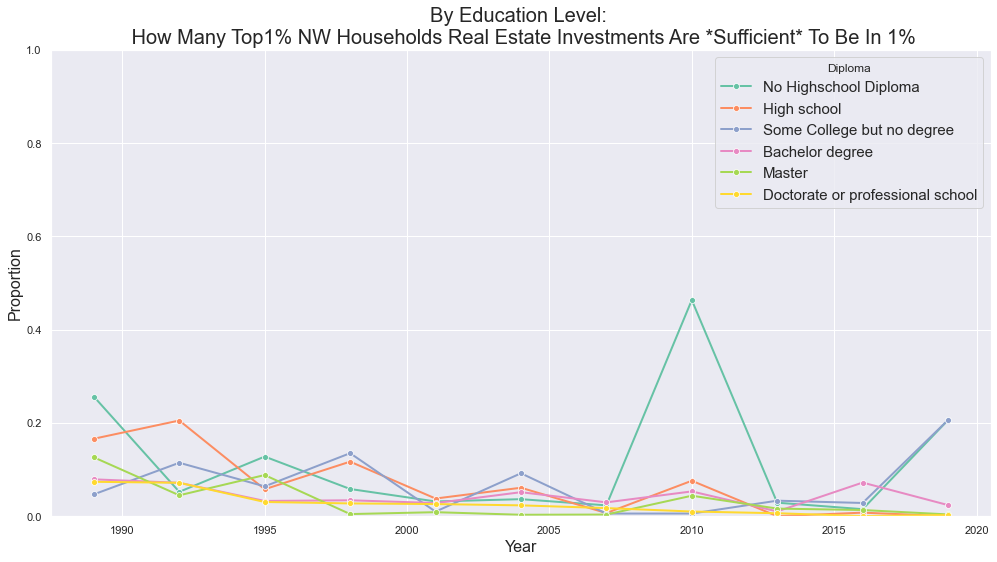

In [196]:
educl_str = ['No Highschool Diploma',
             'High school',
             'Some College but no degree',
             'Bachelor degree',
             'Master',
             'Doctorate or professional school']

plot_S_educ(df, educl_str)

## Seperate N & S for ONLY 3 EDUC Subgroups

## Create 3-Level EDU Variable

In [3]:
df.EDUC_CLEAN.value_counts()

High school                         62268
Some College but no degree          59102
Bachelor degree                     58313
No Highschool Diploma               35016
Master                              29737
Doctorate or professional school    21424
Name: EDUC_CLEAN, dtype: int64

In [4]:
col = 'EDUC_CLEAN'
conditions  = [ (df[col] =='High school') | (df[col]=='Some College but no degree') | 
               (df[col]=='No Highschool Diploma'), 
               df[col]=='Bachelor degree', 
               (df[col]=='Master')|(df[col] =='Doctorate or professional school')]
choices     = [ "No Bachelor",
               'Bachelors degree',
               'Master and above']
    
df["Educ_3L"] = np.select(conditions, choices, default=np.nan)

In [5]:
df.Educ_3L.value_counts()

No Bachelor         156386
Bachelors degree     58313
Master and above     51161
Name: Educ_3L, dtype: int64

In [16]:
def plot_N2_educ(df, edcl_list):
    
    df_N = pd.DataFrame(columns=['year', 'PROP_NEC', 'EDCL'])

    # find threshold of 1% for all households each year
    threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)
    threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})
    df_thresh = df.merge(threshold, how="inner", on=["year", "year"])

    df_thresh['NW_wo_RWI'] = df_thresh['NETWORTH'] - df_thresh['NNRESRE'] # RWI = non-residential RE properties

    for ind_edcl in range(len(edcl_list)):

        sum_weights_belTH_Q1 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['NW_wo_RWI'] < df_thresh['THRESHOLD']]
        sum_weights_belTH_Q1 = (sum_weights_belTH_Q1.loc[df["Educ_3L"]==edcl_list[ind_edcl]])[['year', 'WGT']].groupby('year').sum()
        sum_weight_Q1_1pct = (df.loc[df["ONE_PERC"]==1].loc[df["Educ_3L"]==edcl_list[ind_edcl]])[['year','WGT']].groupby('year').sum()

        NEC = (sum_weights_belTH_Q1/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_NEC'})
        NEC['EDCL'] = edcl_list[ind_edcl]
        NEC['year'] = NEC.index

        df_N = df_N.append(NEC, ignore_index = True)
    
    import matplotlib
    matplotlib.style.use('fivethirtyeight')

    sn.set(rc={"figure.figsize":(15, 8)})
    sn.set_theme(palette="Set2")
    x1 = sn.lineplot(data=df_N, x="year", y="PROP_NEC", hue="EDCL", marker="o", linewidth = 2, palette=['gold', 'cornflowerblue', 'lawngreen'])

    matplotlib.pyplot.legend(title='Diploma', loc='upper right', labels=edcl_list, fontsize=15)
    matplotlib.pyplot.xlabel('Year', fontsize=16)
    matplotlib.pyplot.ylabel('Proportion', fontsize=16)
    matplotlib.pyplot.title("By Education Level: \n How Many Top1% NW Households Real Estate Investments Are *Necessary* To Be In 1%", fontsize=20)
    matplotlib.pyplot.ylim(0,0.3)
    matplotlib.pyplot.show()

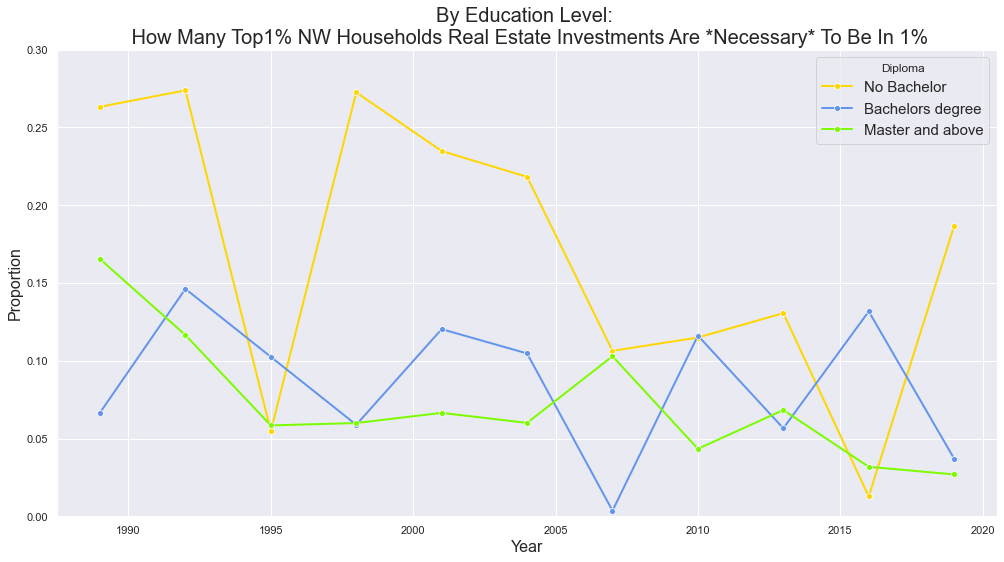

In [17]:
educl_str = ['No Bachelor',
             'Bachelors degree',
             'Master and above']

df = pd.DataFrame(df)
plot_N2_educ(df, educl_str)


In [60]:
def plot_S2_educ(df, edcl_list):
    
    df_S = pd.DataFrame(columns=['year', 'PROP_NEC', 'EDCL'])

    # find threshold of 1% for all households each year
    threshold = df.loc[df["ONE_PERC"]==1].sort_values(['NETWORTH'],ascending=True).groupby('year').head(1)
    threshold = threshold[['NETWORTH', 'year']].rename(columns={'NETWORTH':'THRESHOLD'})
    df_thresh = df.merge(threshold, how="inner", on=["year", "year"])

    df_thresh['RWI'] = df_thresh['NNRESRE'] # RWI = non-residential RE properties

    for ind_edcl in range(len(edcl_list)):
        
        sum_weights_abvTH_Q2 = df_thresh.loc[df_thresh["ONE_PERC"]==1].loc[df_thresh['RWI'] >= df_thresh['THRESHOLD']]
        sum_weights_abvTH_Q2 = (sum_weights_abvTH_Q2.loc[sum_weights_abvTH_Q2['Educ_3L']==edcl_list[ind_edcl]])[['year', 'WGT']].groupby('year').sum()
        
        sum_weight_Q1_1pct = ((df.loc[df["ONE_PERC"]==1].loc[df["Educ_3L"]==edcl_list[ind_edcl]])[['year','WGT']]).groupby('year').sum()
        SUF = (sum_weights_abvTH_Q2/sum_weight_Q1_1pct).rename(columns={'WGT':'PROP_SUF'})

        SUF['EDCL'] = edcl_list[ind_edcl]
        SUF['year'] = SUF.index

        df_S = df_S.append(SUF, ignore_index = True)
        
    sn.set(rc={"figure.figsize":(15, 8)})
    sn.set_theme(palette="Set2")
    x1 = sn.lineplot(data=df_S, x="year", y="PROP_SUF", hue="EDCL", marker="o", linewidth = 2, palette=['gold', 'cornflowerblue', 'lawngreen'])
    plt.legend(title='Diploma', loc='upper right', labels=edcl_list, fontsize=15)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.title("By Education Level: \n How Many Top1% NW Households Real Estate Investments Are *Sufficient* To Be In 1%", fontsize=20)
    plt.show()

In [61]:
educl_str = ['No Bachelor',
             'Bachelors degree',
             'Master and above']

df = pd.DataFrame(df)
plot_S2_educ(df, educl_str)